# plot PDF of Z

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from counterflow_file import *

In [2]:
# parameters
models = ['IEM','IEMHYB','EMST','EMSTHYB']
modeln = ['IEM','IEM-FI','EMST','EMST-FI']

tres = 0.01
Zfvar = 0.1

params = {}
params['tmix'] = 0.4
params['eqv'] = 1.0

case_name = params2name(params)

In [3]:
file_name = 'pdfs_z_{}.csv'.format(case_name)
data = np.genfromtxt(file_name, names=True, delimiter=',')

In [4]:
# figure and axes parameters
# total width is fixed, for one column plot
plot_width    = 6.7
margin_left   = 1.3
margin_right  = 0.2
margin_bottom = 1.0
margin_top    = 0.1
space_width   = 3.5
space_height  = 0.5
ftsize        = 7

font = {'family':'serif',
        'weight':'normal',
        'size':ftsize}

# use TEX for interpreter
plt.rc('text',usetex=True)
# use serif font
plt.rc('font',**font)

num_cols = 1
num_rows = 1

colors = ['tab:orange','tab:blue','tab:green','tab:red']
lines = [':','-','-.','--']

subplot_width = (plot_width
                -margin_left
                -margin_right
                -(num_cols-1)*space_width)/num_cols
subplot_height = subplot_width * 0.8

plot_height = (num_rows*subplot_height
              +margin_bottom
              +margin_top
              +(num_rows-1)*space_height)

(0, 6)

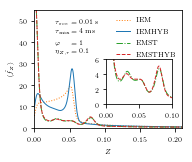

In [7]:
# plot against tmix
fig, ax = plt.subplots(num_rows,num_cols,sharex=True,
                       figsize=cm2inch(plot_width,plot_height))

for i, model in enumerate(models):
    ax.plot(data['x'],data[model],
            c = colors[i], ls = lines[i], lw = 1.,
            label=model)
    
# legend
ax.legend(frameon=False)

# limits
ax.set_xlim([0, 0.21])
ax.set_ylim([0, 55])

# labels
ax.set_xlabel(r'$Z$')
ax.set_ylabel(r'$\langle\tilde{f}_Z\rangle$')

# notes
ax.text(
        0.03,35,
        ''.join([
            r'$\tau_{\mathrm{res}}\,=\,$',
            '{:g}'.format(tres),
            '$\;\mathrm{s}$',
            '\n',
            r'$\tau_{\mathrm{mix}}\!=\,$',
            '{:g}'.format(tres*params['tmix']*1000),
            '$\;\mathrm{ms}$',
            '\n',
            r'$\varphi\quad\;\!=\,$',
            '{:g}'.format(params['eqv']),
            '\n',
            r'$\eta_{Z,r}\!\!\:=\,$',
            '{:g}'.format(Zfvar)]))

fig.subplots_adjust(left = margin_left/plot_width,
                    bottom = margin_bottom/plot_height,
                    right = 1.0-margin_right/plot_width,
                    top = 1.0-margin_top/plot_height,
                    wspace = space_width/plot_width,
                    hspace = space_height/plot_height
                    )

axs = fig.add_axes([0.57, 0.35, 0.35, 0.3])
for i, model in enumerate(models[2:]):
    axs.plot(data['x'],data[model],
            c = colors[i+2], ls = lines[i+2], lw = 1.,
            label=model)

axs.set_xlim([0,0.1])
axs.set_ylim([0,6])

In [8]:
fig.savefig('fig_pdf_z_{}.pdf'.format(case_name))